<a href="https://colab.research.google.com/github/BrunoLoducca/Machine-Learning---Dados-com-Altas-Dimens-es/blob/main/Deep_Learning_Introdu%C3%A7%C3%A3o_com_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
from tensorflow import keras

# Estou armazenando nessa variável os dados, acessados por meio do keras, 
# que são oriundos do fashion_mnist. Veja que, ao contrário de antes, não preciso 
# mandar o pandas ler o arquivo csv, é diferente. 
dataset = keras.datasets.fashion_mnist

# O "dataset.load_data()" me retorna um array com tuplas, que significa
# lista de dados que não permitam modificações. Esse conjunto de dados, 
# por sua vez, armazena uma quantidade de treino e teste para imagens e teste, 
# respectivamente. 
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()



In [2]:
imagens_treino.shape
# Aqui tenho o formato dos dados, 
# no qual o primeiro termo significa a quantidade, 
# o segundo e terceiro a quantidade de linhas e colunas. 

(60000, 28, 28)

Text(0.5, 1.0, '0')

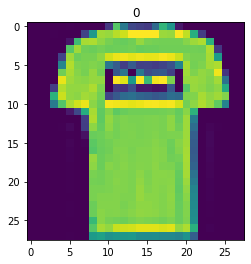

In [3]:
import matplotlib.pyplot as plt

# O matplotlib.pyplot tem o comando de 
# mostrar imagens, por meio do "imshow", reebendo
# como parâmetros o conjunto de dados que armazena as imagens. 
plt.imshow(imagens_treino[1])
# Para saber o label da imagem.
plt.title(identificacoes_treino[1])

In [4]:
# Perceba que o título recebe como valor 0. 
# Para saber o mínimo e máximo, ou seja, 
# o que seria o primeiro título ao último. 

print([identificacoes_treino.min(), identificacoes_treino.max()])

[0, 9]


In [5]:
# Ou seja, o primeiro valor é, aqui, o 0 e o último o 9. 
# Dessa forma, podemos dizer que há 10 títulos, contando 
# a partir de cada elemento, començando com o zero. 
total_de_identificacoes = 10
nome_das_identificacoes = ["Camiseta", "Calça", "Pullover", "Vestido", "Casaco", "Sandalha", 
                           "Camisa", "Tênis", "Bolsa", "Bota"]

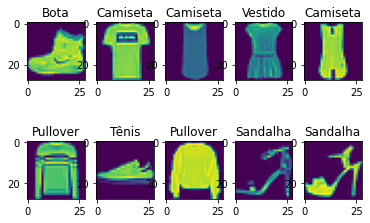

In [6]:
# Eu quero vizualizar uma quantidade de imagens, para isso:

for imagem in range(total_de_identificacoes):
  # Para mostrar todas as imagens dentro desse alcance, tenho que usar o
  # subplot, passando como parâmetros o número de linhas, colunas e, para mostrar
  # todas as imagens, "imagem+1"
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  # Estou nomeando os labels que antes estavam representados em números. 
  plt.title(nome_das_identificacoes[identificacoes_treino[imagem]])

# Como pode ver, há duas linhas com cinco colunas. 

# Implementação do modelo de DeepLearning

In [7]:
# O aprendizado no deep learning se dá em sequência de entrada, processamento e saida
# dos dados. Dessa forma, chamamos o keras que realiza o sequenciamento por meio do 
# keras.Sequential (Sequential em inglês = senquência). 

# A primeira camada desse sequenciamento é a entrada dos dados. 
# Para tanto, chamo keras.layers. Como meus dados se tratam de imagens 
# e no primeiro momento essas são achatas em uma única linha com n 
# colunas correspondentes a quantidade por pixels da imagem (aqui como 
# a imagem é feita de 28x28 pixels a quantidade de colunas
# será correspondente ao produto desse valor), chamo a função
# que faz isso, que é o Flatten. Por fim, passo o formato de entrada, 
# que é como a imagem é composta, de 28x28. 

# A segunda camada representa o processamento, no qual há as "redes neurais"
# Para a chamar também peço ao keras e executo o comando Dense, que se refere
# a comunicação totalmente concectada que os dados da entrada irão exercer
# com os "neurônios" os quais estão dentro da esfera do processamento. 
# Para definir a quantidade de neurônios, que é bom sempre em ser múltiplo de 2, 
# coloco o número, como mostrado, e depois, para ativar, chamo o activation. 
# Como a ativação está dentro do tensorflow o chamo, "nn" significa as redes neurais, 
# e relu é a função a qual estarei utilizando para esse processo. 

# Traduzindo "activation=tensorflow.nn.relu": estou ativando a função redes neurais, 
# que usará a função relu, as quais se encontram no tensorflow. 

# A terceira camada, que melhor seria dizer a camada de saida, é feita da seguinte forma:
# Chamamos o keras.layers e também o Dense, mas o primeiro termo, que aqui é o número 10, 
# ao invés de representar a quantidade de neurônios, representa a quantidade de saidas, 
# a qual está atrelada a quantidade de identificações dos meus dados, que é 10. 
modelo = keras.Sequential([
                           keras.layers.Flatten(input_shape=(28, 28)),                 # camada de entrada -> camada 0
                           keras.layers.Dense(256, activation=tensorflow.nn.relu),     # camada de processamento -> camada 1
                           keras.layers.Dense(10, activation=tensorflow.nn.softmax)])  # camada de saida -> camada 2

# Antes de efetivamente treinar o modelo, que passou pelo deep learning,
# preciso compilá-lo, que assim faço dessa maneira. 
# Aqui há o otimizador, que ajuda a treinar melhor e a perda, que se refere
# a perda de informação. Em aspas há o método que estará para a otimização e perda. 
modelo.compile(optimizer="adam", loss="sparse_categorical_crossentropy")        

# Treino do modelo
modelo.fit(imagens_treino, identificacoes_treino)              

1875/1875 [==============================] - 11s 6ms/step - loss: 4.1546


In [8]:
# Acima há o resultado do treinamento, mostrando também a perda de informação.

# Reduzindo a perda de informação.

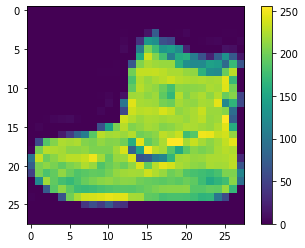

In [9]:
# Para reduzir as perdas de informação, começo, aqui, a respeito 
# das imagens. 

plt.imshow(imagens_treino[0])
plt.colorbar()

In [10]:
from tensorflow.python.ops.nn_ops import dropout
# Cada imagem é formada por um gradiente de 250px. 
# Numa tentativa de normalizar vou colocar esse gradiente
# num intervalo de 0 a 1:

# Normalização. 
imagens_treino = imagens_treino/float(250)

# "keras.dropout" é uma técnica usada para pôr os neurônios
# para "dormir", isto é, para que eles não viciem as informações, 
# que pode mitigar a acurácia da validação. 

modelo = keras.Sequential([
                           keras.layers.Flatten(input_shape=(28, 28)),                 
                           keras.layers.Dense(256, activation=tensorflow.nn.relu),     
                           #keras.layers.Dense(128, activation=tensorflow.nn.relu),
                           #keras.layers.Dense(64, activation=tensorflow.nn.relu),
                           #keras.layers.Dense(32, activation=tensorflow.nn.relu),
                           #keras.layers.Dense(16, activation=tensorflow.nn.relu),
                           keras.layers.Dropout(0.2),
                           keras.layers.Dense(10, activation=tensorflow.nn.softmax)])  

# accuracy = acurácia, que me retorna a taxa de acerto. 
modelo.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])        

# epochs significa quantas vezes eu quero treinar. 
# validation_split é uma porção de quanto quero reservar para a validação. 
modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)     

# Escalonando o gradiente com um valor máximo de 1, 
# temos uma queda na perda. 

Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5276 - accuracy: 0.8145 - val_loss: 0.4283 - val_accuracy: 0.8457
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3983 - accuracy: 0.8549 - val_loss: 0.3578 - val_accuracy: 0.8700
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3627 - accuracy: 0.8672 - val_loss: 0.3447 - val_accuracy: 0.8751
Epoch 4/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3413 - accuracy: 0.8751 - val_loss: 0.3495 - val_accuracy: 0.8719
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3237 - accuracy: 0.8794 - val_loss: 0.3274 - val_accuracy: 0.8823


In [11]:
import numpy as np

# Predizendo os resultados
previsao = modelo.predict(imagens_teste)

print(np.argmax(previsao[8]))
print(identificacoes_teste[8])

5
5


In [12]:
# Para saber a acurácia: 

perda_do_teste, acuracia = modelo.evaluate(imagens_teste, identificacoes_teste)
print(" Perda do teste:", perda_do_teste)
print(" A acurácia é de: %.2f" % (acuracia*100), "%")

313/313 [==============================] - 1s 2ms/step - loss: 49.9911 - accuracy: 0.8640
 Perda do teste: 49.99112319946289
 A acurácia é de: 86.40 %


# Visualizando o gráfico de acurácia

In [13]:
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)     
print(historico)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3120 - accuracy: 0.8836 - val_loss: 0.3263 - val_accuracy: 0.8792
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3008 - accuracy: 0.8873 - val_loss: 0.3311 - val_accuracy: 0.8797
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2882 - accuracy: 0.8926 - val_loss: 0.3274 - val_accuracy: 0.8832
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2787 - accuracy: 0.8954 - val_loss: 0.3311 - val_accuracy: 0.8799
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2723 - accuracy: 0.8972 - val_loss: 0.3169 - val_accuracy: 0.8883


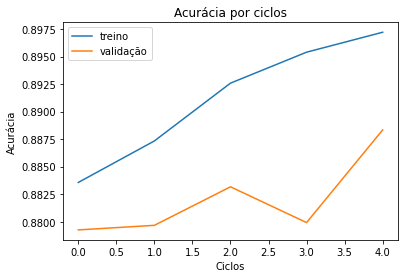

In [14]:
# Os ciclos simboliza os epoch's mostrado acima. 

plt.plot(historico.history["accuracy"])       # significa a acurácia do treino. 
plt.plot(historico.history["val_accuracy"])
plt.title("Acurácia por ciclos")
plt.xlabel("Ciclos")
plt.ylabel("Acurácia")
plt.legend(["treino", "validação"])

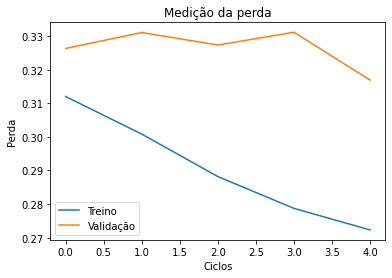

In [15]:
# visualizando o gráfico da perda: 

plt.plot(historico.history["loss"])
plt.plot(historico.history["val_loss"])
plt.title("Medição da perda")
plt.xlabel("Ciclos")
plt.ylabel("Perda")
plt.legend(["Treino", "Validação"])

In [16]:
from tensorflow.keras.models import load_model

# Para salvar e carregar o modelo:
modelo.save("modelo.h5")
modelo_salvo = load_model("modelo.h5")
